In [ ]:
import torch
import torch.nn as nn


class B2_VGG(nn.Module):
    def __init__(self):
        super(B2_VGG, self).__init__()
        conv1 = nn.Sequential()
        conv1.add_module('conv1_1', nn.Conv2d(3, 64, 3, 1, 1))
        conv1.add_module('relu1_1', nn.ReLU(inplace=True))
        conv1.add_module('conv1_2', nn.Conv2d(64, 64, 3, 1, 1))
        conv1.add_module('relu1_2', nn.ReLU(inplace=True))

        self.conv1 = conv1
        conv2 = nn.Sequential()
        conv2.add_module('pool1', nn.AvgPool2d(2, stride=2))
        conv2.add_module('conv2_1', nn.Conv2d(64, 128, 3, 1, 1))
        conv2.add_module('relu2_1', nn.ReLU())
        conv2.add_module('conv2_2', nn.Conv2d(128, 128, 3, 1, 1))
        conv2.add_module('relu2_2', nn.ReLU())
        self.conv2 = conv2

        conv3 = nn.Sequential()
        conv3.add_module('pool2', nn.AvgPool2d(2, stride=2))
        conv3.add_module('conv3_1', nn.Conv2d(128, 256, 3, 1, 1))
        conv3.add_module('relu3_1', nn.ReLU())
        conv3.add_module('conv3_2', nn.Conv2d(256, 256, 3, 1, 1))
        conv3.add_module('relu3_2', nn.ReLU())
        conv3.add_module('conv3_3', nn.Conv2d(256, 256, 3, 1, 1))
        conv3.add_module('relu3_3', nn.ReLU())
        self.conv3 = conv3

        conv4_1 = nn.Sequential()
        conv4_1.add_module('pool3_1', nn.AvgPool2d(2, stride=2))
        conv4_1.add_module('conv4_1_1', nn.Conv2d(256, 512, 3, 1, 1))
        conv4_1.add_module('relu4_1_1', nn.ReLU())
        conv4_1.add_module('conv4_2_1', nn.Conv2d(512, 512, 3, 1, 1))
        conv4_1.add_module('relu4_2_1', nn.ReLU())
        conv4_1.add_module('conv4_3_1', nn.Conv2d(512, 512, 3, 1, 1))
        conv4_1.add_module('relu4_3_1', nn.ReLU())
        self.conv4_1 = conv4_1

        conv5_1 = nn.Sequential()
        conv5_1.add_module('pool4_1', nn.AvgPool2d(2, stride=2))
        conv5_1.add_module('conv5_1_1', nn.Conv2d(512, 512, 3, 1, 1))
        conv5_1.add_module('relu5_1_1', nn.ReLU())
        conv5_1.add_module('conv5_2_1', nn.Conv2d(512, 512, 3, 1, 1))
        conv5_1.add_module('relu5_2_1', nn.ReLU())
        conv5_1.add_module('conv5_3_1', nn.Conv2d(512, 512, 3, 1, 1))
        conv5_1.add_module('relu5_3_1', nn.ReLU())
        self.conv5_1 = conv5_1

        conv4_2 = nn.Sequential()
        conv4_2.add_module('pool3_2', nn.AvgPool2d(2, stride=2))
        conv4_2.add_module('conv4_1_2', nn.Conv2d(256, 512, 3, 1, 1))
        conv4_2.add_module('relu4_1_2', nn.ReLU())
        conv4_2.add_module('conv4_2_2', nn.Conv2d(512, 512, 3, 1, 1))
        conv4_2.add_module('relu4_2_2', nn.ReLU())
        conv4_2.add_module('conv4_3_2', nn.Conv2d(512, 512, 3, 1, 1))
        conv4_2.add_module('relu4_3_2', nn.ReLU())
        self.conv4_2 = conv4_2

        conv5_2 = nn.Sequential()
        conv5_2.add_module('pool4_2', nn.AvgPool2d(2, stride=2))
        conv5_2.add_module('conv5_1_2', nn.Conv2d(512, 512, 3, 1, 1))
        conv5_2.add_module('relu5_1_2', nn.ReLU())
        conv5_2.add_module('conv5_2_2', nn.Conv2d(512, 512, 3, 1, 1))
        conv5_2.add_module('relu5_2_2', nn.ReLU())
        conv5_2.add_module('conv5_3_2', nn.Conv2d(512, 512, 3, 1, 1))
        conv5_2.add_module('relu5_3_2', nn.ReLU())
        self.conv5_2 = conv5_2

        pre_train = torch.load('./Snapshots/pre_trained/vgg16-397923af.pth')
        self._initialize_weights(pre_train)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x1 = self.conv4_1(x)
        x1 = self.conv5_1(x1)
        x2 = self.conv4_2(x)
        x2 = self.conv5_2(x2)
        return x1, x2

    def _initialize_weights(self, pre_train):
        keys = list(pre_train.keys())
        self.conv1.conv1_1.weight.data.copy_(pre_train[keys[0]])
        self.conv1.conv1_2.weight.data.copy_(pre_train[keys[2]])
        self.conv2.conv2_1.weight.data.copy_(pre_train[keys[4]])
        self.conv2.conv2_2.weight.data.copy_(pre_train[keys[6]])
        self.conv3.conv3_1.weight.data.copy_(pre_train[keys[8]])
        self.conv3.conv3_2.weight.data.copy_(pre_train[keys[10]])
        self.conv3.conv3_3.weight.data.copy_(pre_train[keys[12]])
        self.conv4_1.conv4_1_1.weight.data.copy_(pre_train[keys[14]])
        self.conv4_1.conv4_2_1.weight.data.copy_(pre_train[keys[16]])
        self.conv4_1.conv4_3_1.weight.data.copy_(pre_train[keys[18]])
        self.conv5_1.conv5_1_1.weight.data.copy_(pre_train[keys[20]])
        self.conv5_1.conv5_2_1.weight.data.copy_(pre_train[keys[22]])
        self.conv5_1.conv5_3_1.weight.data.copy_(pre_train[keys[24]])
        self.conv4_2.conv4_1_2.weight.data.copy_(pre_train[keys[14]])
        self.conv4_2.conv4_2_2.weight.data.copy_(pre_train[keys[16]])
        self.conv4_2.conv4_3_2.weight.data.copy_(pre_train[keys[18]])
        self.conv5_2.conv5_1_2.weight.data.copy_(pre_train[keys[20]])
        self.conv5_2.conv5_2_2.weight.data.copy_(pre_train[keys[22]])
        self.conv5_2.conv5_3_2.weight.data.copy_(pre_train[keys[24]])

        self.conv1.conv1_1.bias.data.copy_(pre_train[keys[1]])
        self.conv1.conv1_2.bias.data.copy_(pre_train[keys[3]])
        self.conv2.conv2_1.bias.data.copy_(pre_train[keys[5]])
        self.conv2.conv2_2.bias.data.copy_(pre_train[keys[7]])
        self.conv3.conv3_1.bias.data.copy_(pre_train[keys[9]])
        self.conv3.conv3_2.bias.data.copy_(pre_train[keys[11]])
        self.conv3.conv3_3.bias.data.copy_(pre_train[keys[13]])
        self.conv4_1.conv4_1_1.bias.data.copy_(pre_train[keys[15]])
        self.conv4_1.conv4_2_1.bias.data.copy_(pre_train[keys[17]])
        self.conv4_1.conv4_3_1.bias.data.copy_(pre_train[keys[19]])
        self.conv5_1.conv5_1_1.bias.data.copy_(pre_train[keys[21]])
        self.conv5_1.conv5_2_1.bias.data.copy_(pre_train[keys[23]])
        self.conv5_1.conv5_3_1.bias.data.copy_(pre_train[keys[25]])
        self.conv4_2.conv4_1_2.bias.data.copy_(pre_train[keys[15]])
        self.conv4_2.conv4_2_2.bias.data.copy_(pre_train[keys[17]])
        self.conv4_2.conv4_3_2.bias.data.copy_(pre_train[keys[19]])
        self.conv5_2.conv5_1_2.bias.data.copy_(pre_train[keys[21]])
        self.conv5_2.conv5_2_2.bias.data.copy_(pre_train[keys[23]])
        self.conv5_2.conv5_3_2.bias.data.copy_(pre_train[keys[25]])


In [ ]:
# -*- coding: utf-8 -*-

"""Preview
Code for 'Inf-Net: Automatic COVID-19 Lung Infection Segmentation from CT Scans'
submit to Transactions on Medical Imaging, 2020.

First Version: Created on 2020-05-05 (@author: Ge-Peng Ji)
Second Version: Fix some bugs and edit some parameters on 2020-05-15. (@author: Ge-Peng Ji)
"""

import torch
import torch.nn as nn
import torch.nn.functional as F
#from Code.model_lung_infection.backbone.VGGNet import B2_VGG
# import B2_VGG


class BasicConv2d(nn.Module):
    def __init__(self, in_planes, out_planes, kernel_size, stride=1, padding=0, dilation=1):
        super(BasicConv2d, self).__init__()
        self.conv = nn.Conv2d(in_planes, out_planes,
                              kernel_size=kernel_size, stride=stride,
                              padding=padding, dilation=dilation, bias=False)
        self.bn = nn.BatchNorm2d(out_planes)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        return x


class RFB_modified(nn.Module):
    def __init__(self, in_channel, out_channel):
        super(RFB_modified, self).__init__()
        self.relu = nn.ReLU(True)
        self.branch0 = nn.Sequential(
            BasicConv2d(in_channel, out_channel, 1),
        )
        self.branch1 = nn.Sequential(
            BasicConv2d(in_channel, out_channel, 1),
            BasicConv2d(out_channel, out_channel, kernel_size=(1, 3), padding=(0, 1)),
            BasicConv2d(out_channel, out_channel, kernel_size=(3, 1), padding=(1, 0)),
            BasicConv2d(out_channel, out_channel, 3, padding=3, dilation=3)
        )
        self.branch2 = nn.Sequential(
            BasicConv2d(in_channel, out_channel, 1),
            BasicConv2d(out_channel, out_channel, kernel_size=(1, 5), padding=(0, 2)),
            BasicConv2d(out_channel, out_channel, kernel_size=(5, 1), padding=(2, 0)),
            BasicConv2d(out_channel, out_channel, 3, padding=5, dilation=5)
        )
        self.branch3 = nn.Sequential(
            BasicConv2d(in_channel, out_channel, 1),
            BasicConv2d(out_channel, out_channel, kernel_size=(1, 7), padding=(0, 3)),
            BasicConv2d(out_channel, out_channel, kernel_size=(7, 1), padding=(3, 0)),
            BasicConv2d(out_channel, out_channel, 3, padding=7, dilation=7)
        )
        self.conv_cat = BasicConv2d(4*out_channel, out_channel, 3, padding=1)
        self.conv_res = BasicConv2d(in_channel, out_channel, 1)

    def forward(self, x):
        x0 = self.branch0(x)
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x_cat = self.conv_cat(torch.cat((x0, x1, x2, x3), 1))

        x = self.relu(x_cat + self.conv_res(x))
        return x


class aggregation(nn.Module):
    # dense aggregation, it can be replaced by other aggregation previous, such as DSS, amulet, and so on.
    # used after MSF
    def __init__(self, channel, n_class):
        super(aggregation, self).__init__()
        self.relu = nn.ReLU(True)

        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.conv_upsample1 = BasicConv2d(channel, channel, 3, padding=1)
        self.conv_upsample2 = BasicConv2d(channel, channel, 3, padding=1)
        self.conv_upsample3 = BasicConv2d(channel, channel, 3, padding=1)
        self.conv_upsample4 = BasicConv2d(channel, channel, 3, padding=1)
        self.conv_upsample5 = BasicConv2d(2*channel, 2*channel, 3, padding=1)

        self.conv_concat2 = BasicConv2d(2*channel, 2*channel, 3, padding=1)
        self.conv_concat3 = BasicConv2d(3*channel, 3*channel, 3, padding=1)
        self.conv4 = BasicConv2d(3*channel, 3*channel, 3, padding=1)
        self.conv5 = nn.Conv2d(3*channel, n_class, 1)

    def forward(self, x1, x2, x3):
        x1_1 = x1
        x2_1 = self.conv_upsample1(self.upsample(x1)) * x2
        x3_1 = self.conv_upsample2(self.upsample(self.upsample(x1))) \
               * self.conv_upsample3(self.upsample(x2)) * x3

        x2_2 = torch.cat((x2_1, self.conv_upsample4(self.upsample(x1_1))), 1)
        x2_2 = self.conv_concat2(x2_2)

        x3_2 = torch.cat((x3_1, self.conv_upsample5(self.upsample(x2_2))), 1)
        x3_2 = self.conv_concat3(x3_2)

        x = self.conv4(x3_2)
        x = self.conv5(x)

        return x


class Inf_Net(nn.Module):
    def __init__(self, channel=32, n_class=1):
        super(Inf_Net, self).__init__()
        # ---- ResNet Backbone ----
        # self.resnet = res2net50_v1b_26w_4s(pre_trained=True)
        self.vgg = B2_VGG()
        # ---- Receptive Field Block like module ----
        self.rfb2_1 = RFB_modified(256, channel)
        self.rfb3_1 = RFB_modified(512, channel)
        self.rfb4_1 = RFB_modified(512, channel)

        # ---- Partial Decoder ----
        self.ParDec = aggregation(channel, n_class)
        # ---- reverse attention branch 4 ----
        self.ra4_conv1 = BasicConv2d(512, 256, kernel_size=1)
        self.ra4_conv2 = BasicConv2d(256+64, 256, kernel_size=5, padding=2)
        self.ra4_conv3 = BasicConv2d(256, 256, kernel_size=5, padding=2)
        self.ra4_conv4 = BasicConv2d(256, 256, kernel_size=5, padding=2)
        self.ra4_conv5 = BasicConv2d(256, n_class, kernel_size=1)
        # ---- reverse attention branch 3 ----
        self.ra3_conv1 = BasicConv2d(512, 64, kernel_size=1)
        self.ra3_conv2 = BasicConv2d(64+64, 64, kernel_size=3, padding=1)
        self.ra3_conv3 = BasicConv2d(64, 64, kernel_size=3, padding=1)
        self.ra3_conv4 = BasicConv2d(64, n_class, kernel_size=3, padding=1)
        # ---- reverse attention branch 2 ----
        self.ra2_conv1 = BasicConv2d(256, 64, kernel_size=1)
        self.ra2_conv2 = BasicConv2d(64+64, 64, kernel_size=3, padding=1)
        self.ra2_conv3 = BasicConv2d(64, 64, kernel_size=3, padding=1)
        self.ra2_conv4 = BasicConv2d(64, n_class, kernel_size=3, padding=1)

        # ---- edge branch ----
        self.edge_conv1 = BasicConv2d(128, 64, kernel_size=1)
        self.edge_conv2 = BasicConv2d(64, 64, kernel_size=3, padding=1)
        self.edge_conv3 = BasicConv2d(64, 64, kernel_size=3, padding=1)
        self.edge_conv4 = BasicConv2d(64, n_class, kernel_size=3, padding=1)

    def forward(self, x):
        x = self.vgg.conv1(x)   # torch.Size([1, 64, 352, 352])
        x1 = self.vgg.conv2(x)  # torch.Size([1, 128, 176, 176])
        x2 = self.vgg.conv3(x1) # torch.Size([1, 256, 88, 88])

        x3 = self.vgg.conv4_1(x2)   # torch.Size([1, 512, 44, 44])
        x4 = self.vgg.conv5_1(x3)   # torch.Size([1, 512, 22, 22])

        x2_rfb = self.rfb2_1(x2)        # channel -> 32
        x3_rfb = self.rfb3_1(x3)        # channel -> 32
        x4_rfb = self.rfb4_1(x4)        # channel -> 32

        # ---- edge guidance ----
        x = self.edge_conv1(x1)
        x = self.edge_conv2(x)
        edge_guidance = self.edge_conv3(x)  # torch.Size([1, 64, 88, 88])
        lateral_edge = self.edge_conv4(edge_guidance)   # NOTES: Sup-2 (bs, 1, 88, 88) -> (bs, 1, 352, 352)
        lateral_edge = F.interpolate(lateral_edge,
                                     scale_factor=2,
                                     mode='bilinear')

        # ---- global guidance ----
        ra5_feat = self.ParDec(x4_rfb, x3_rfb, x2_rfb)
        lateral_map_5 = F.interpolate(ra5_feat,
                                      scale_factor=4,
                                      mode='bilinear')    # NOTES: Sup-1 (bs, 1, 44, 44) -> (bs, 1, 352, 352)

        # ---- reverse attention branch_4 ----
        crop_4 = F.interpolate(ra5_feat, scale_factor=0.25, mode='bilinear')
        x = -1*(torch.sigmoid(crop_4)) + 1  # reverse
        x = x.expand(-1, 512, -1, -1).mul(x4)
        x = torch.cat((self.ra4_conv1(x), F.interpolate(edge_guidance, scale_factor=1/8, mode='bilinear')), dim=1)
        x = F.relu(self.ra4_conv2(x))
        x = F.relu(self.ra4_conv3(x))
        x = F.relu(self.ra4_conv4(x))
        ra4_feat = self.ra4_conv5(x)
        x = ra4_feat + crop_4   # element-wise addition
        lateral_map_4 = F.interpolate(x,
                                      scale_factor=16,
                                      mode='bilinear')  # NOTES: Sup-2 (bs, 1, 11, 11) -> (bs, 1, 352, 352)

        # ---- reverse attention branch_3 ----
        crop_3 = F.interpolate(x, scale_factor=2, mode='bilinear')
        x = -1*(torch.sigmoid(crop_3)) + 1
        x = x.expand(-1, 512, -1, -1).mul(x3)
        x = torch.cat((self.ra3_conv1(x), F.interpolate(edge_guidance, scale_factor=1/4, mode='bilinear')), dim=1)
        x = F.relu(self.ra3_conv2(x))
        x = F.relu(self.ra3_conv3(x))
        ra3_feat = self.ra3_conv4(x)
        x = ra3_feat + crop_3
        lateral_map_3 = F.interpolate(x,
                                      scale_factor=8,
                                      mode='bilinear')  # NOTES: Sup-3 (bs, 1, 22, 22) -> (bs, 1, 352, 352)

        # ---- reverse attention branch_2 ----
        crop_2 = F.interpolate(x, scale_factor=2, mode='bilinear')

        x = -1*(torch.sigmoid(crop_2)) + 1
        x = x.expand(-1, 256, -1, -1).mul(x2)
        x = torch.cat((self.ra2_conv1(x), F.interpolate(edge_guidance, scale_factor=1/2, mode='bilinear')), dim=1)
        x = F.relu(self.ra2_conv2(x))
        x = F.relu(self.ra2_conv3(x))
        ra2_feat = self.ra2_conv4(x)
        x = ra2_feat + crop_2
        lateral_map_2 = F.interpolate(x,
                                      scale_factor=4,
                                      mode='bilinear')   # NOTES: Sup-4 (bs, 1, 44, 44) -> (bs, 1, 352, 352)

        return lateral_map_5, lateral_map_4, lateral_map_3, lateral_map_2, lateral_edge


# if __name__ == '__main__':
#     ras = PraNetPlusPlus().cuda()
#     input_tensor = torch.randn(1, 3, 352, 352).cuda()

#     out = ras(input_tensor)
#     print(out[0].shape, out[1].shape, out[2].shape, out[3].shape, out[4].shape)


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [ ]:
from fastai.vision import *

In [9]:
path = Path('/content/drive/MyDrive/testimg')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import numpy as np 
np.random.seed(41)
data = ImageDataBunch.from_folder(path, train="train", valid ="test",
        ds_tfms=get_transforms(), size=(256,256), bs=1, num_workers=4).normalize()



/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/fastai/basic_data.py:262: UserWarning: There seems to be something wrong with your dataset, for example, in the first batch can't access any element of self.train_ds.
Tried: 22
  warn(warn_msg)


You can deactivate this warning by passing `no_check=True`.


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


In [24]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Covided', 'NonCov'], 2, 24, 5)

In [27]:
xb,yb = data.one_batch()
xb.shape,yb.shape

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


(torch.Size([1, 3, 256, 256]), torch.Size([1]))

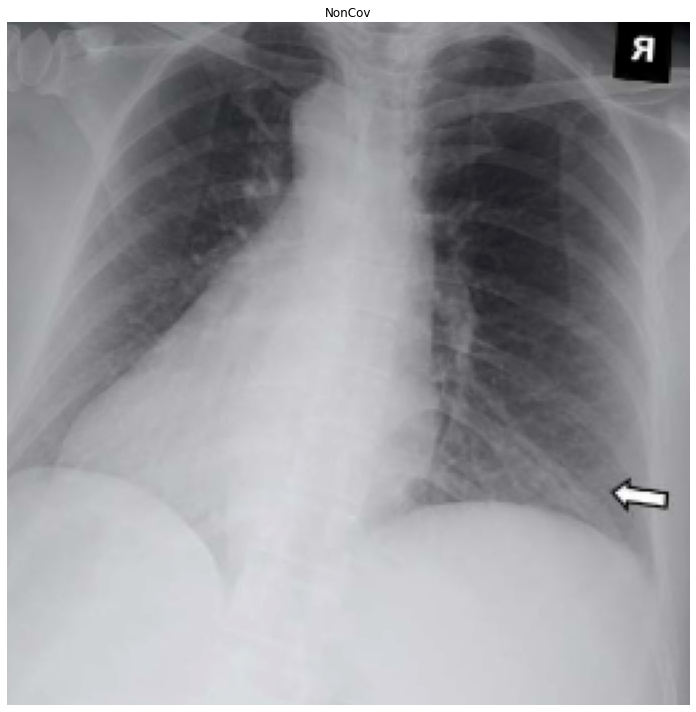

In [28]:
#Sample images from the dataset
data.show_batch(rows=3, figsize=(10,10))

In [40]:
def conv_block(ni, nf, size=3, stride=1):
    for_pad = lambda s: s if s > 2 else 3
    return nn.Sequential(
        nn.Conv2d(ni, nf, kernel_size=size, stride=stride,
                  padding=(for_pad(size) - 1)//2, bias=False), 
        nn.BatchNorm2d(nf),
        nn.LeakyReLU(negative_slope=0.1, inplace=True)  
    )

In [39]:
def triple_conv(ni, nf):
    return nn.Sequential(
        conv_block(ni, nf),
        conv_block(nf, ni, size=1),  
        conv_block(ni, nf)
    )

In [38]:
def maxpooling():
    return nn.MaxPool2d(2, stride=2)

In [37]:
model = nn.Sequential(
    conv_block(3, 8),
    maxpooling(),
    conv_block(8, 16),
    maxpooling(),
    triple_conv(16, 32),
    maxpooling(),
    triple_conv(32, 64),
    maxpooling(),
    triple_conv(64, 128),
    maxpooling(),
    triple_conv(128, 256),
    conv_block(256, 128, size=1),
    conv_block(128, 256),
    conv_layer(256, 2),
    Flatten(),
    nn.Linear(338, 2)
)

In [33]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [34]:
print(learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 256, 256]        216        True      
______________________________________________________________________
BatchNorm2d          [8, 256, 256]        16         True      
______________________________________________________________________
LeakyReLU            [8, 256, 256]        0          False     
______________________________________________________________________
MaxPool2d            [8, 128, 128]        0          False     
______________________________________________________________________
Conv2d               [16, 128, 128]       1,152      True      
______________________________________________________________________
BatchNorm2d          [16, 128, 128]       32         True      
______________________________________________________________________
LeakyReLU            [16, 128, 128]       0          False     
___________________________________________________

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


In [44]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [45]:
learn.fit_one_cycle(100, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.355651,0.752667,0.400000,00:05
1,0.246048,0.794767,0.600000,00:05
2,0.342943,0.921570,0.400000,00:05
3,0.350703,0.990043,0.200000,00:05
4,0.347033,1.184411,0.200000,00:05
5,0.264412,0.849401,0.400000,00:05
6,0.269835,0.824022,0.600000,00:05
7,0.436158,1.480298,0.600000,00:05
8,0.379572,1.211884,0.200000,00:05
9,0.438353,1.464568,0.600000,00:05


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

In [46]:
print("Number of examples in testing:", len(data.valid_ds))

Number of examples in testing: 5


In [47]:
probs,targets = learn.get_preds(ds_type=DatasetType.Valid) 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

In [48]:
accuracy(probs,targets)

tensor(0.6000)

In [49]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Covided', 'NonCov'], 2, 24, 5)

In [50]:
probs = np.argmax(probs, axis=1)
correct = 0
for idx, pred in enumerate(probs):
    if pred == targets[idx]:
        correct += 1
accuracy = correct / len(probs)
print(len(probs), correct, accuracy)

from sklearn.metrics import confusion_matrix
np.set_printoptions(threshold=np.inf) 
cm1 = confusion_matrix(targets, probs)
print(cm1)

from sklearn.metrics import classification_report
y_true1 = targets
y_pred1 = probs
target_names = ['Covid-19', 'No_findings']
print(classification_report(y_true1, y_pred1, target_names=target_names))

5 3 0.6
[[2 0]
 [2 1]]
              precision    recall  f1-score   support

    Covid-19       0.50      1.00      0.67         2
 No_findings       1.00      0.33      0.50         3

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



In [51]:
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

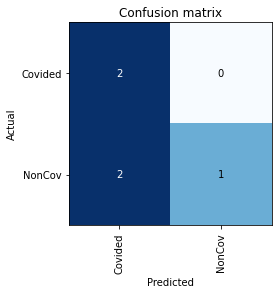

In [52]:
cm_fig = interp.plot_confusion_matrix(return_fig=True)
ax = cm_fig.gca()
ax.set_ylim(interp.data.c - .5, - .5);